In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.Chem import Crippen
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7, 11.7)})

In [2]:
import csv
with open('Tomas_Otava_CDG_Epidermal_growth_factor_receptor_erbB1_list_of_compounds.csv','r') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=";")
    rawdata = [x for x in reader]
lig_MOLECULES = [Chem.MolFromSmiles(x['Smiles']) for x in rawdata]

Načtení erbB1

In [3]:
suppl = Chem.SDMolSupplier('drugbank.sdf')
drugs = [m for m in suppl if m]
len(drugs)

RDKit ERROR: [21:14:23] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [21:14:23] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [21:14:24] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [21:14:24] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [21:14:23] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [21:14:24] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [21:14:24] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [21:14:24] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [21:14:24] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [21:14:24] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [21:14:24] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [21:14:24] Can't kek

RDKit ERROR: [21:14:25] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [21:14:25] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [21:14:25] ERROR: Could not sanitize molecule ending on line 519056
RDKit ERROR: [21:14:25] ERROR: Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [21:14:25] Explicit valence for atom # 6 B, 4, is greater than permitted
RDKit ERROR: [21:14:25] ERROR: Could not sanitize molecule ending on line 541262
RDKit ERROR: [21:14:25] ERROR: Explicit valence for atom # 6 B, 4, is greater than permitted
RDKit ERROR: [21:14:25] Can't kekulize mol.  Unkekulized atoms: 2 3 17 19 20
RDKit ERROR: 
RDKit ERROR: [21:14:25] ERROR: Could not sanitize molecule ending on line 557517
RDKit ERROR: [21:14:25] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 17 19 20
RDKit ERROR: 
RDKit ERROR: [21:14:25] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit E

7113

Načtení drugbanku

In [4]:
def TooManyHBD(mol):
    # takes an RDKit mol instance, returns True if the structure is out of LRO5 bounds
    return rdescriptors.CalcNumLipinskiHBD(mol) > 5

def TooManyHBA(mol):
    return rdescriptors.CalcNumLipinskiHBA(mol) > 10

def TooHeavy(mol):
    return rdescriptors.CalcExactMolWt(mol) > 500

def TooGreasy(mol):
    return Descriptors.MolLogP(mol) > 5

def TooHeavy_plus50(mol):
    return rdescriptors.CalcExactMolWt(mol) > 550 

def TooGreasy_plusHalf(mol):
    return Descriptors.MolLogP(mol) > 5.5

Definice funkcí (jelikož jsem po prvních pokusech zjistil, že nejvěrším problémem jsou MW a logP molekul, chtěl jsem podívat kolik molekul nesplňuje podmínky jen těsně -> proto další dvě funkce)

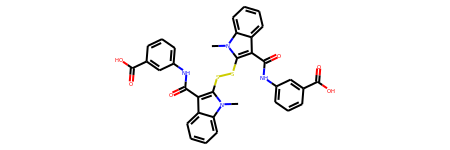

In [5]:
lig_MOLECULES[2507]

In [6]:
TooManyHBD(lig_MOLECULES[2507]), TooManyHBA(lig_MOLECULES[2507]), TooHeavy(lig_MOLECULES[2507]), TooGreasy(lig_MOLECULES[2507])

(False, False, True, True)

In [7]:
erbB1_ligands_TooManyHBD = [TooManyHBD(x) for x in lig_MOLECULES]
erbB1_ligands_TooManyHBA = [TooManyHBA(x) for x in lig_MOLECULES]
erbB1_ligands_TooHeavy = [TooHeavy(x) for x in lig_MOLECULES]
erbB1_ligands_TooGreasy = [TooGreasy(x) for x in lig_MOLECULES]
erbB1_ligands_TooHeavy_plus50 = [TooHeavy_plus50(x) for x in lig_MOLECULES]
erbB1_ligands_TooGreasy_plusHalf = [TooGreasy_plusHalf(x) for x in lig_MOLECULES]
sum(erbB1_ligands_TooManyHBD), sum(erbB1_ligands_TooManyHBA), sum(erbB1_ligands_TooHeavy), sum(erbB1_ligands_TooGreasy), sum(erbB1_ligands_TooHeavy_plus50), sum(erbB1_ligands_TooGreasy_plusHalf), len(lig_MOLECULES) 

(215, 898, 3337, 3489, 1870, 2201, 12496)

Je vidět, že již do základní podmínky splnilo zhruba 75 % látek, s lehkým pozměněním podmíněných hodnot MW a logP jsem zjistil, že dalších 10 % ligandů nesplňuje podmínky a vcelku malou hodnotu.

In [8]:
tabulka = pd.DataFrame(data={'set':'mtor','TooManyHBD': erbB1_ligands_TooManyHBD,'TooManyHBA': erbB1_ligands_TooManyHBA,
                        'TooHeavy': erbB1_ligands_TooHeavy,'TooGreasy': erbB1_ligands_TooGreasy, 'TooHeavyplus50': erbB1_ligands_TooHeavy_plus50,'TooGreasyplusHalf': erbB1_ligands_TooGreasy_plusHalf})
tabulka

,set,TooManyHBD,TooManyHBA,TooHeavy,TooGreasy,TooHeavyplus50,TooGreasyplusHalf
0,mtor,False,False,False,False,False,False
1,mtor,False,False,False,False,False,False
2,mtor,False,False,False,False,False,False
3,mtor,False,True,True,False,True,False
4,mtor,False,False,True,False,False,False
...,...,...,...,...,...,...,...
12491,mtor,False,False,True,True,True,True
12492,mtor,False,False,False,False,False,False
12493,mtor,False,False,True,True,True,True
12494,mtor,False,False,False,False,False,False


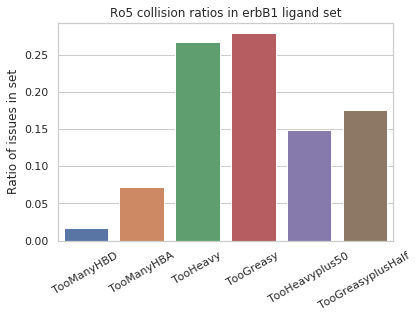

In [9]:
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=tabulka, ci=None)
    p.set_title("Ro5 collision ratios in erbB1 ligand set")
    p.set_ylabel("Ratio of issues in set")
    p.set_xticklabels(p.get_xticklabels(), rotation=30)

In [10]:
def ro5_violations(mol):
    return sum([TooManyHBD(mol), TooManyHBA(mol), TooHeavy(mol), TooGreasy(mol)])
def ViolatesLipinski(mol):
    return ro5_violations(mol) > 1
def ro5_violations_kdybyMW550_logP5_5(mol):
    return sum([TooManyHBD(mol), TooManyHBA(mol), TooHeavy_plus50(mol), TooGreasy_plusHalf(mol)])
def ViolatesLipinski_kdybyMW550_logP5_5(mol):
    return ro5_violations_kdybyMW550_logP5_5(mol) > 1
erbB1_ro5_violations = [ro5_violations(x) for x in lig_MOLECULES]
erbB1_violates_Lipinski = [ViolatesLipinski(x) for x in lig_MOLECULES]
erbB1_ro5_violations_kdybyMW550_logP5_5 = [ro5_violations_kdybyMW550_logP5_5(x) for x in lig_MOLECULES]
erbB1_violates_Lipinski_kdybyMW550_logP5_5 = [ViolatesLipinski_kdybyMW550_logP5_5(x) for x in lig_MOLECULES]
sum(erbB1_ro5_violations), sum(erbB1_ro5_violations)/len(erbB1_ro5_violations), sum(erbB1_violates_Lipinski), sum(erbB1_violates_Lipinski)/len(erbB1_violates_Lipinski), sum(erbB1_ro5_violations_kdybyMW550_logP5_5), sum(erbB1_ro5_violations_kdybyMW550_logP5_5)/len(erbB1_ro5_violations_kdybyMW550_logP5_5), sum(erbB1_violates_Lipinski_kdybyMW550_logP5_5), sum(erbB1_violates_Lipinski_kdybyMW550_logP5_5)/len(erbB1_violates_Lipinski_kdybyMW550_logP5_5)

(7939,
 0.6353233034571063,
 2363,
 0.18910051216389245,
 5184,
 0.4148527528809219,
 1452,
 0.11619718309859155)

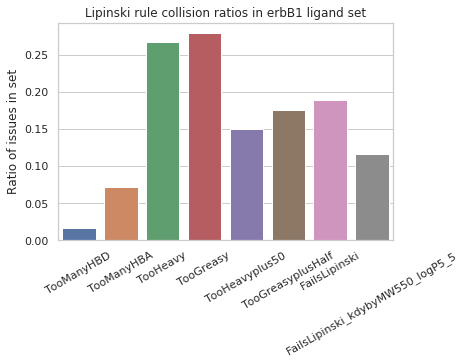

In [11]:
tabulka['FailsLipinski'] = erbB1_violates_Lipinski
tabulka['FailsLipinski_kdybyMW550_logP5_5'] = erbB1_violates_Lipinski_kdybyMW550_logP5_5
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=tabulka, ci=None)
    p.set_title("Lipinski rule collision ratios in erbB1 ligand set")
    p.set_ylabel("Ratio of issues in set")
    p.set_xticklabels(p.get_xticklabels(), rotation=30)

Tak z vizualizace je vidět, že více než 80 % ligandů v mém setu splňují Lipinského pravidlo, což si myslím není zas tak špatný výsledek na tak vcelku objemný set. 

Když jsem dále vyzkoušel porušení Lipinského pravidla pokud by se hranice MW a logP o trochu posunuli byl bychom už na cca 88 %.

In [12]:
def BadGreasynessGhose(mol):
    logp = Descriptors.MolLogP(mol)
    return logp > 5.6 or logp < -0.4

tabulka['OddGreasyness'] = [BadGreasynessGhose(x) for x in lig_MOLECULES]

def BadRefractivityGhose(mol):
    ref = Crippen.MolMR(mol)
    return ref > 130 or ref < 40
tabulka['OddRefractivity'] = [BadRefractivityGhose(x) for x in lig_MOLECULES]

def BadMWGhose(mol):
    mw = rdescriptors.CalcExactMolWt(mol)
    return mw > 480 or mw < 180
tabulka['OddMass'] = [BadMWGhose(x) for x in lig_MOLECULES]

def BadAtomcountGhose(mol):
    ac = mol.GetNumHeavyAtoms()
    return ac > 70 or ac < 20
tabulka['OddAtomcount'] = [BadAtomcountGhose(x) for x in lig_MOLECULES]

def ViolatesGhose(mol):
    return BadGreasynessGhose(mol) or BadRefractivityGhose(mol) or BadMWGhose(mol) or BadAtomcountGhose(mol)
tabulka['FailsGhose'] = [ViolatesGhose(x) for x in lig_MOLECULES]

def TooRotatableVeber(mol):
    return Chem.CalcNumRotatableBonds(mol) > 10
tabulka['TooRotatable'] = [TooRotatableVeber(x) for x in lig_MOLECULES]

def TooLargePSAVeber(mol):
    return rdescriptors.CalcTPSA(mol) > 140
tabulka['ExcessivePSA'] = [TooLargePSAVeber(x) for x in lig_MOLECULES]

def ViolatesVeber(mol):
    return TooRotatableVeber(mol) or TooLargePSAVeber(mol)
tabulka['FailsVeber'] = [ViolatesVeber(x) for x in lig_MOLECULES]

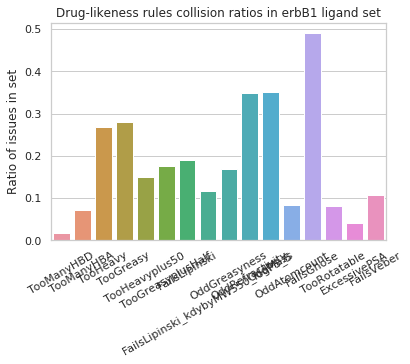

In [13]:
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=tabulka, ci=None)
    p.set_title("Drug-likeness rules collision ratios in erbB1 ligand set")
    p.set_ylabel("Ratio of issues in set")
    p.set_xticklabels(p.get_xticklabels(), rotation=30)

Z těchto tří různých filtrů (Lipinski, Ghose a Veber) se tento set ligandů vymiká kontrole Ghosovým podmínkám, kde největším problémem je vysoká MW a vysoká refraktivita.

In [14]:
tabulka_drugbank = pd.DataFrame(
    data={'set':'DrugBank',
          'TooManyHBD': [TooManyHBD(x) for x in drugs],
          'TooManyHBA': [TooManyHBA(x) for x in drugs],
          'TooGreasy': [TooGreasy(x) for x in drugs],
          'TooHeavy': [TooHeavy(x) for x in drugs],
          'FailsLipinski': [ViolatesLipinski(x) for x in drugs],
          'OddGreasyness': [BadGreasynessGhose(x) for x in drugs],
          'OddRefractivity': [BadRefractivityGhose(x) for x in drugs],
          'OddMass': [BadMWGhose(x) for x in drugs],
          'OddAtomcount': [BadAtomcountGhose(x) for x in drugs],
          'FailsGhose': [ViolatesGhose(x) for x in drugs],
          'TooRotatable': [TooRotatableVeber(x) for x in drugs],
          'ExcessivePSA': [TooLargePSAVeber(x) for x in drugs],
          'FailsVeber': [ViolatesVeber(x) for x in drugs]})
tabulka_drugbank

,set,TooManyHBD,TooManyHBA,TooGreasy,TooHeavy,FailsLipinski,OddGreasyness,OddRefractivity,OddMass,OddAtomcount,FailsGhose,TooRotatable,ExcessivePSA,FailsVeber
0,DrugBank,True,True,False,True,True,True,True,True,True,True,True,True,True
1,DrugBank,True,True,False,True,True,True,True,True,True,True,True,True,True
2,DrugBank,True,True,False,True,True,True,True,True,True,True,True,True,True
3,DrugBank,True,True,False,True,True,True,True,True,True,True,True,True,True
4,DrugBank,False,True,False,True,True,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,DrugBank,False,False,False,False,False,False,True,True,True,True,False,False,False
7109,DrugBank,False,False,False,False,False,True,False,False,False,True,False,True,True
7110,DrugBank,True,True,False,True,True,False,True,True,True,True,True,True,True
7111,DrugBank,False,False,False,False,False,False,False,False,False,False,True,False,True


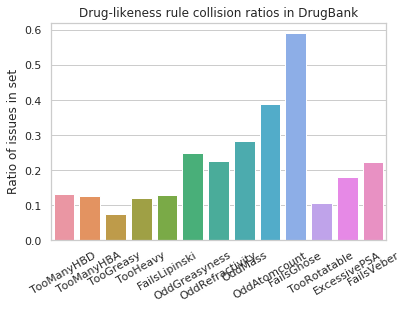

In [15]:
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=tabulka_drugbank, ci=None)
    p.set_title("Drug-likeness rule collision ratios in DrugBank")
    p.set_ylabel("Ratio of issues in set")
    p.set_xticklabels(p.get_xticklabels(), rotation=30)

Při porovnávání setu ligandů pro erbB1 s setem ligandů drugbanku jsem zjistil, že po usilovném boji můj set vyhrál 2:1

Lipinski 0:1

Ghose    1:1

Veber    2:1